# Task 1: Regression

## Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('laptop_prices.csv')
data.head()

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
# Check for null values
data.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,4
Screen,0
ScreenW,0
ScreenH,0


In [ ]:
# Drop null values
data.dropna(inplace=True)
data.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0
ScreenH,0


In [ ]:
# Check for duplicated values
data.duplicated().sum()

1

In [ ]:
# Remove duplicate values
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
# Remove irrelevant columns
data = data.drop(columns=['Screen', 'ScreenW', 'ScreenH', 'SecondaryStorage', 'SecondaryStorageType'])

# Convert 'Price_euros' to float
data['Price_euros'] = pd.to_numeric(data['Price_euros'], errors='coerce')


In [ ]:
# Convert categorical columns into numeric using one-hot encoding
categorical_cols = ['Company', 'TypeName', 'OS', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'GPU_model', 'GPU_company']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data.head()

,Inches,Ram,Weight,Price_euros,CPU_freq,PrimaryStorage,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,13.3,8,1.37,1339.69,2.3,128,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,13.3,8,1.34,898.94,1.8,128,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,15.6,8,1.86,575.00,2.5,256,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,15.4,16,1.83,2537.45,2.7,512,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,1803.60,3.1,256,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Check and convert numeric columns to correct types if necessary
data['Inches'] = pd.to_numeric(data['Inches'], errors='coerce')
data['Ram'] = pd.to_numeric(data['Ram'], errors='coerce')
data['Weight'] = pd.to_numeric(data['Weight'], errors='coerce')
data['CPU_freq'] = pd.to_numeric(data['CPU_freq'], errors='coerce')
data['PrimaryStorage'] = pd.to_numeric(data['PrimaryStorage'], errors='coerce')


# Separate features and target
X = data.drop(columns=['Price_euros'])
y = data['Price_euros']

In [ ]:
X

,Inches,Ram,Weight,CPU_freq,PrimaryStorage,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,13.3,8,1.37,2.3,128,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,13.3,8,1.34,1.8,128,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,15.6,8,1.86,2.5,256,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,15.4,16,1.83,2.7,512,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,3.1,256,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,15.6,4,2.20,2.5,500,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1270,14.0,4,1.80,2.5,128,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1271,13.3,16,1.30,2.5,512,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1272,14.0,2,1.50,1.6,64,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Data Exploration

            Inches          Ram       Weight  Price_euros     CPU_freq  \
count  1267.000000  1267.000000  1267.000000  1267.000000  1267.000000   
mean     15.019258     8.440410     2.152778  1137.149890     2.302999   
std       1.433241     5.097954     3.123727   701.777743     0.504089   
min      10.100000     2.000000     0.690000   174.000000     0.900000   
25%      14.000000     4.000000     1.500000   612.805000     2.000000   
50%      15.600000     8.000000     2.040000   989.000000     2.500000   
75%      15.600000     8.000000     2.310000  1498.500000     2.700000   
max      18.400000    64.000000   100.000000  6099.000000     3.600000   

       PrimaryStorage  
count     1267.000000  
mean       444.258090  
std        365.629001  
min          8.000000  
25%        256.000000  
50%        256.000000  
75%        512.000000  
max       2048.000000  
                  Inches       Ram    Weight  Price_euros  CPU_freq  \
Inches          1.000000  0.241926  0.192313  

<Figure size 1200x800 with 0 Axes>

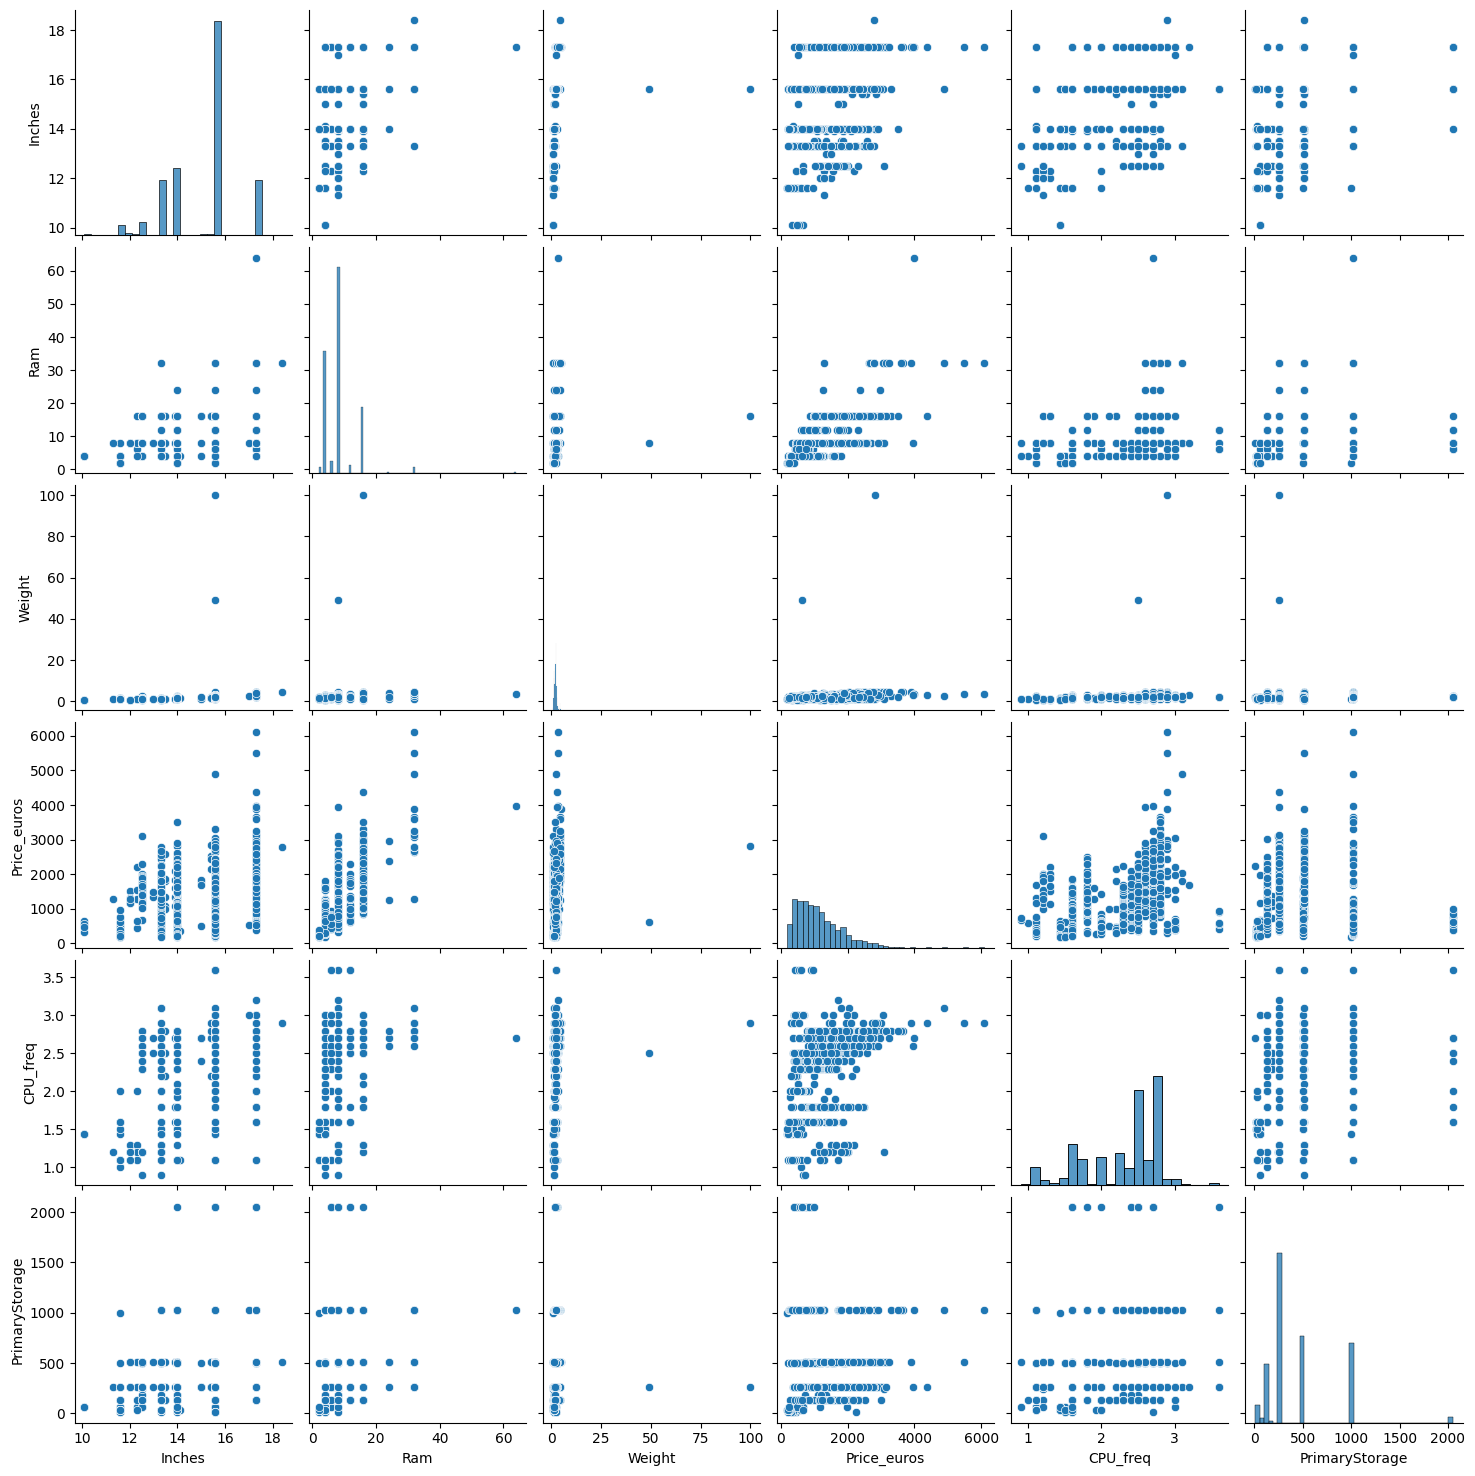

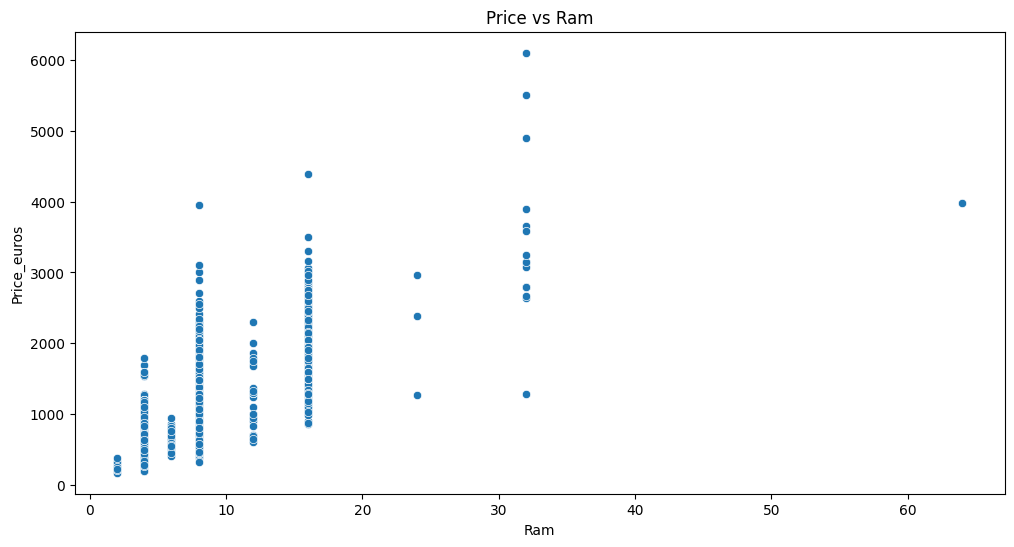

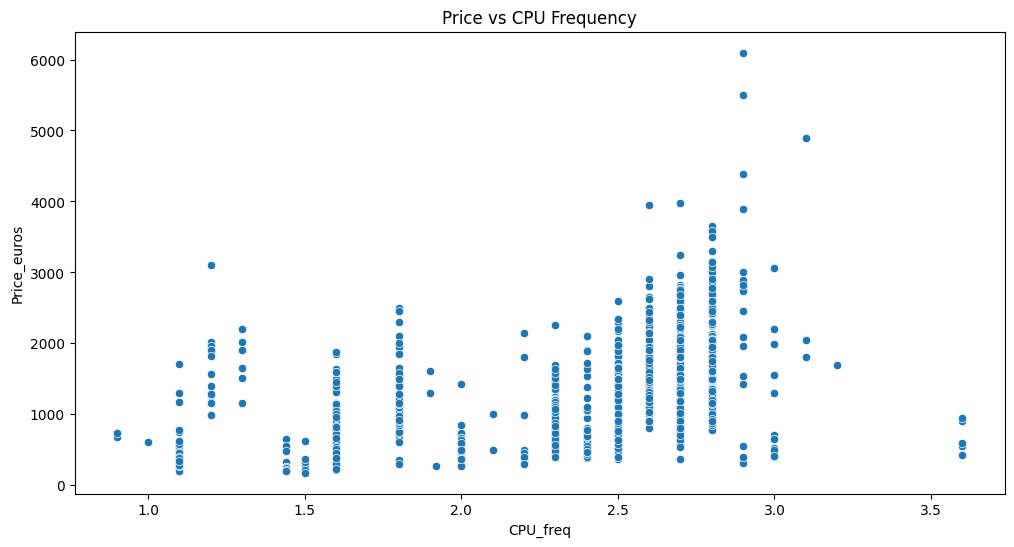

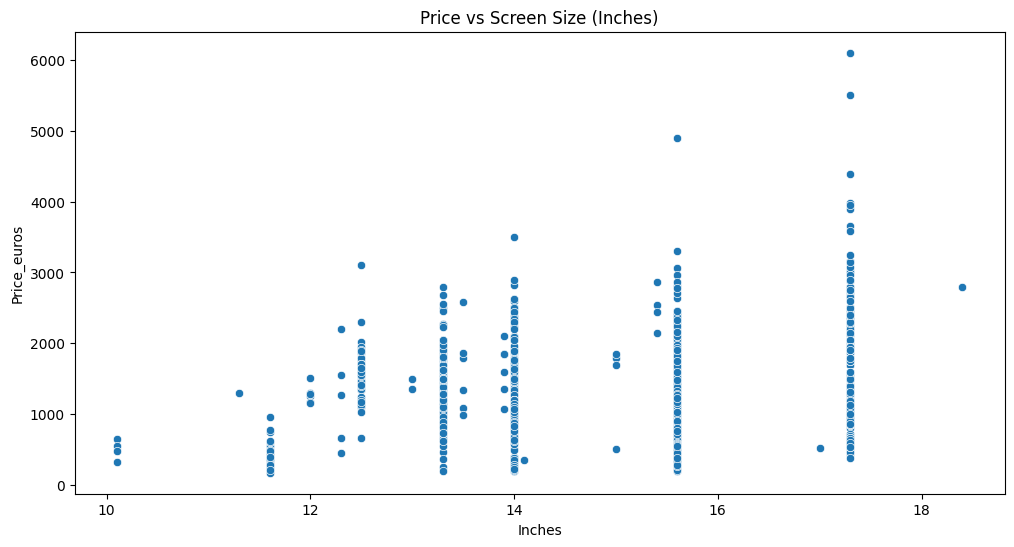

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics
print(data.describe())

# Compute the correlation matrix (only for numerical columns)
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)

# PairPlot
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=['Inches', 'Ram', 'Weight', 'Price_euros', 'CPU_freq', 'PrimaryStorage'])
plt.show()

# Plot Price vs key features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Ram', y='Price_euros', data=data)
plt.title('Price vs Ram')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='CPU_freq', y='Price_euros', data=data)
plt.title('Price vs CPU Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Inches', y='Price_euros', data=data)
plt.title('Price vs Screen Size (Inches)')
plt.show()


## Data Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R^2 Score: {r2_lr}')


Linear Regression MSE: 91789.90020731883
Linear Regression R^2 Score: 0.7906312715625821


In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}')

Ridge Regression MSE: 67523.3825163941
Ridge Regression R^2 Score: 0.8459821319631026


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree MSE: {mse_dt}')
print(f'Decision Tree R^2 Score: {r2_dt}')


Decision Tree MSE: 122744.61768730315
Decision Tree R^2 Score: 0.7200249213727921


# Task 2: Classification

## Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('student_dropout_academic_success.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.shape

(4424, 37)

In [ ]:
# Check duplicated values
data.duplicated().sum()


0

In [ ]:
# Check and drop null values
print(data.isnull().sum())
data.dropna(inplace=True)

Marital status                                    0
Application mode                                  0
Application order                                 1
Course                                            2
Daytime/evening attendance\t                      3
Previous qualification                            3
Previous qualification (grade)                    5
Nacionality                                       5
Mother's qualification                            4
Father's qualification                            4
Mother's occupation                               5
Father's occupation                               4
Admission grade                                   3
Displaced                                         3
Educational special needs                         3
Debtor                                            3
Tuition fees up to date                           2
Gender                                            2
Scholarship holder                                2
Age at enrol

## Data Exploration

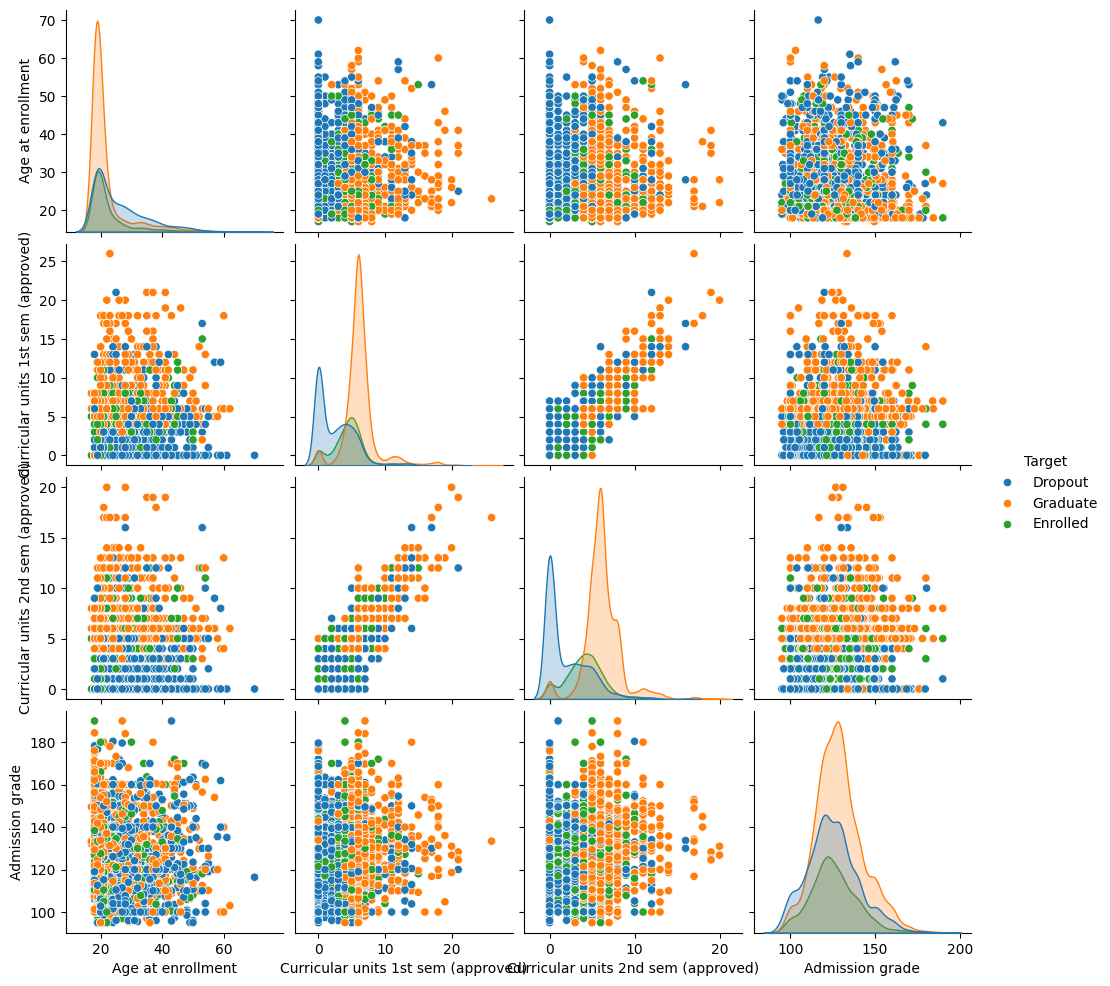

In [ ]:
# Pairplot
sns.pairplot(data[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Admission grade', 'Target']], hue='Target')
plt.show()


## Data Modeling

In [ ]:
# Encode the target variable 'Target' (Dropout/Graduate/Enrolled) into a binary classification (Dropout=1, others=0)
data['Target'] = data['Target'].map({'Dropout': 1, 'Graduate': 0, 'Enrolled': 0})


# Handle categorical features
categorical_cols = ['Marital status', 'Application mode', 'Course', 'Previous qualification',
                    'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
                    'Father\'s occupation', 'Gender', 'Scholarship holder', 'International']

# Apply one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into features (X) and target (y)
X = data.drop(columns=['Target'])
y = data['Target']

# Handle  numerical features
numerical_cols = ['Application order', 'Previous qualification (grade)', 'Admission grade',
                  'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
                  'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                  'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                  'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                  'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                  'Unemployment rate', 'Inflation rate', 'GDP']

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


# Logistic Regression Evaluation
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))



Logistic Regression Accuracy:  0.8844847112117781
Logistic Regression Confusion Matrix:
 [[567  44]
 [ 58 214]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       611
           1       0.83      0.79      0.81       272

    accuracy                           0.88       883
   macro avg       0.87      0.86      0.86       883
weighted avg       0.88      0.88      0.88       883



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate performance
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8493771234428086
KNN Confusion Matrix:
[[584  27]
 [106 166]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       611
           1       0.86      0.61      0.71       272

    accuracy                           0.85       883
   macro avg       0.85      0.78      0.81       883
weighted avg       0.85      0.85      0.84       883



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Evaluate performance
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.3420158550396376
Naive Bayes Confusion Matrix:
[[ 37 574]
 [  7 265]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.06      0.11       611
           1       0.32      0.97      0.48       272

    accuracy                           0.34       883
   macro avg       0.58      0.52      0.30       883
weighted avg       0.68      0.34      0.23       883

